This is a simple regression task. We are using a KERAS model and some basic plotting.

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
rm_quote = lambda x: x.replace('"', '')
names = ["mpg", "cylinder", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 names=names, converters={'car_name': rm_quote})

In [3]:
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df['car_name'].unique().size

305

we will exclude 'car_name' later on

In [6]:
df.dtypes

mpg             float64
cylinder          int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

'horsepower' column has object type. See why.

In [7]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

we will handle this '?' onwards

In [8]:
X = df[["cylinder", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]].values
y = df["mpg"].values

In [9]:
trans = ColumnTransformer([
    ('imp', SimpleImputer(missing_values='?', strategy='most_frequent', verbose=1), [2])],
    remainder='passthrough'
)

X = trans.fit_transform(X)

In [10]:
X[X[:, 2] == '?']

array([], shape=(0, 7), dtype=object)

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

In [12]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [13]:
model = Sequential()
model.add(Dense(7, input_dim=7, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mean_absolute_percentage_error', metrics=['mean_squared_error'])

history = model.fit(x=train_X, y=train_y,
                    validation_data=(test_X, test_y), batch_size=32, epochs=50, verbose=0)

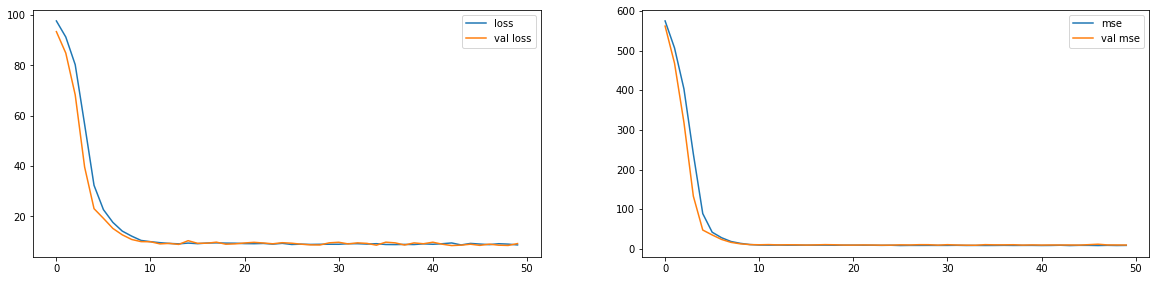

In [14]:
pyplot.figure(figsize=(20, 10))
pyplot.subplot(221)
pyplot.plot(history.history['loss'], label='loss')
pyplot.plot(history.history['val_loss'], label='val loss')
pyplot.legend()
pyplot.subplot(222)
pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.plot(history.history['val_mean_squared_error'], label='val mse')
pyplot.legend()
pyplot.show()

In [15]:
pred_y = model.evaluate(x=test_X, y=test_y)

80/80 [==============================] - 0s 62us/step


In [16]:
print("test loss:%.2f, test mse:%.2f" % (pred_y[0], pred_y[1]))

test loss:9.21, test mse:9.69
